# I) Data Cleaning and Preparation

1. Import data

In [24]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
#Import data and create a copy dataset that can be edited on
df = pd.read_csv('jeans_dataset.csv')
dfcopy = df.copy()
dfcopy.head()

,designer_names,condition,price,user/seller_score/rating_average,follower_count,location,makeoffer,category,type,created_at,category_path_size,category_size,color,department,title,category_path,brand,hashtags,created_year,created_month,traits,shipping_options,price_drops,image_path
0,Japanese Brand × Kapital × Mizra Jeans Kyoto,is_used,160,4.755556,57,Asia,True,bottoms,ListProduct,2025-05-15 13:37:31.298,bottoms.denim.30,bottoms.30,gray,menswear,Concave Japan Studded Details Tribal Panel Gra...,bottoms.denim,Kapital,[],2025,5,"{'color': 'gray', 'country_of_origin': 'JP'}","{'us': {'amount': 28}, 'uk': {'amount': 28}, '...","[nan, nan, nan, nan]",kapital/bottoms/listproduct/a5680d5adf694ac889...
1,Kapital × Number (N)ine × Vintage,is_gently_used,179,5.000000,70,Europe,True,bottoms,ListProduct,2025-05-14 17:16:20.980,bottoms.denim.34,bottoms.34,blue,menswear,Vintage Kapital Inspired Hippie Denim Saschiko...,bottoms.denim,Kapital,[],2025,5,"{'color': 'blue', 'country_of_origin': 'PL'}","{'us': {'amount': 15}, 'uk': {'amount': 15}, '...","[nan, nan, nan, nan]",kapital/bottoms/listproduct/a727e26491ee41659d...
2,Kapital × Kapital Kountry,is_new,900,4.916667,31,United States,True,bottoms,ListProduct,2025-05-16 00:48:05.189,bottoms.shorts.32,bottoms.32,blue,menswear,Kapital 14oz Denim 5P Shorts (BONE Embroidery),bottoms.shorts,Kapital,"['jeans', 'denim', 'skull', 'kapital', 'bone',...",2025,5,"{'color': 'blue', 'country_of_origin': 'JP'}","{'us': {'amount': 13}, 'uk': {'amount': 25}, '...","[nan, nan, nan, nan]",kapital/bottoms/listproduct/650d840e680943da91...
3,Kapital,is_used,418,4.428571,16,Europe,True,bottoms,ListProduct,2025-05-15 19:07:50.641,bottoms.cropped_pants.32,bottoms.32,multi,menswear,Steal Grail! Japan Kapital boro jeans pants cu...,bottoms.cropped_pants,Kapital,[],2025,5,"{'color': 'multi', 'country_of_origin': 'US'}","{'us': {'amount': 20}, 'uk': {'amount': 15}, '...","[nan, nan, nan, nan]",kapital/bottoms/listproduct/6237eedf706d432095...
4,Kapital,is_new,601,4.948478,6,Asia,True,bottoms,ListProduct,2025-05-16 20:04:46.704,bottoms.denim.32,bottoms.32,blue,menswear,Kapital Gemstone Denim Pants Blue Size 32-2505,bottoms.denim,Kapital,[],2025,5,"{'color': 'blue', 'country_of_origin': 'JP'}","{'us': {'amount': 0}, 'uk': {'amount': 0}, 'eu...","[nan, nan, nan, nan]",kapital/bottoms/listproduct/f51b3ad8789543bcad...


2. Initial Data Review

In [26]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   designer_names                    5440 non-null   object 
 1   condition                         5440 non-null   object 
 2   price                             5440 non-null   int64  
 3   user/seller_score/rating_average  5246 non-null   float64
 4   follower_count                    5440 non-null   int64  
 5   location                          5440 non-null   object 
 6   makeoffer                         5440 non-null   bool   
 7   category                          5440 non-null   object 
 8   type                              5440 non-null   object 
 9   created_at                        5440 non-null   object 
 10  category_path_size                5440 non-null   object 
 11  category_size                     5440 non-null   object 
 12  color 

In [27]:
dfcopy.describe()

,price,user/seller_score/rating_average,follower_count,created_year,created_month
count,5440.000000,5246.000000,5440.000000,5440.0,5440.000000
mean,383.786029,4.886923,15.617831,2025.0,4.884926
std,829.662113,0.122045,38.725035,0.0,0.320864
min,9.000000,3.454545,0.000000,2025.0,3.000000
25%,100.000000,4.856971,1.000000,2025.0,5.000000
50%,200.000000,4.912429,4.000000,2025.0,5.000000
75%,475.000000,4.961221,17.000000,2025.0,5.000000
max,29950.000000,5.000000,996.000000,2025.0,5.000000


In [28]:
dfcopy.describe(include='object')

,designer_names,condition,location,category,type,created_at,category_path_size,category_size,color,department,title,category_path,brand,hashtags,traits,shipping_options,price_drops,image_path
count,5440,5440,5440,5440,5440,5440,5440,5440,5405,5440,5440,5440,5440,5440,5440,5439,5440,5428
unique,376,4,7,1,1,5432,98,19,17,1,4894,8,6,1312,278,1048,364,5226
top,Rick Owens,is_gently_used,Asia,bottoms,ListProduct,2025-05-14 17:45:08.680,bottoms.denim.32,bottoms.32,blue,menswear,Kapital Smooth jersey TH.D.D. baggy track pants,bottoms.denim,Levi's,[],"{'color': 'black', 'country_of_origin': 'IT'}","{'us': {'amount': 0}, 'uk': {'amount': 0}, 'eu...","[nan, nan, nan, nan]",rick_owens/bottoms/listproduct/09dcc1ba98d44e7...
freq,739,2407,2408,5440,5440,2,667,1126,2116,5440,12,3408,1016,3301,620,862,4899,11


3. Data Cleansing

In [29]:
#Check the N/A records in the table
print(dfcopy.isna().sum())

designer_names                        0
condition                             0
price                                 0
user/seller_score/rating_average    194
follower_count                        0
location                              0
makeoffer                             0
category                              0
type                                  0
created_at                            0
category_path_size                    0
category_size                         0
color                                35
department                            0
title                                 0
category_path                         0
brand                                 0
hashtags                              0
created_year                          0
created_month                         0
traits                                0
shipping_options                      1
price_drops                           0
image_path                           12
dtype: int64


In [30]:
#Check traits if can find the color from that
dfcopy[['traits', 'color', ]][dfcopy['color'].isna()].head()

,traits,color
133,{'unvalidated_color': 'indigo/pink'},NaN
293,{'unvalidated_color': 'black white brown'},NaN
504,{'unvalidated_color': 'indigo/pink'},NaN
516,{'unvalidated_color': 'see photo'},NaN
663,{'unvalidated_color': 'indigo/pink'},NaN


In [31]:
## Fix Unstructured Data
#Extract the information from traits column
dfcopy['found_color']= dfcopy['traits'].str.extract(r"'unvalidated_color':\s*'([^']*)'")
dfcopy['country_origin'] = dfcopy['traits'].str.extract(r"'country_of_origin':\s*'([^']*)'")

# Clean  the traits column
dfcopy['color'] = dfcopy['color'].fillna(dfcopy['found_color'])
dfcopy.drop(['found_color'],axis=1,inplace=True)
dfcopy.drop(['traits'],axis=1,inplace=True)

In [32]:
# Handling missing and inconsistent data
seephoto = ['see photo','see at picture','please see the photos', 'refer photos given','?']
color_replacements = {
    **{phrase: 'unknown' for phrase in seephoto},
    'gr': 'gray',
    'balck': 'black'
}
dfcopy['color'] = dfcopy['color'].replace(color_replacements)
dfcopy['hashtags'] = dfcopy['hashtags'].replace('[]', 'None')
dfcopy['price_drops'] = dfcopy['price_drops'].replace('[nan, nan, nan, nan]', 'None')

mean_rating = dfcopy['user/seller_score/rating_average'].mean()
dfcopy['user/seller_score/rating_average'] = dfcopy['user/seller_score/rating_average'].fillna(mean_rating)

dfcopy.head(5)

,designer_names,condition,price,user/seller_score/rating_average,follower_count,location,makeoffer,category,type,created_at,category_path_size,category_size,color,department,title,category_path,brand,hashtags,created_year,created_month,shipping_options,price_drops,image_path,country_origin
0,Japanese Brand × Kapital × Mizra Jeans Kyoto,is_used,160,4.755556,57,Asia,True,bottoms,ListProduct,2025-05-15 13:37:31.298,bottoms.denim.30,bottoms.30,gray,menswear,Concave Japan Studded Details Tribal Panel Gra...,bottoms.denim,Kapital,None,2025,5,"{'us': {'amount': 28}, 'uk': {'amount': 28}, '...",None,kapital/bottoms/listproduct/a5680d5adf694ac889...,JP
1,Kapital × Number (N)ine × Vintage,is_gently_used,179,5.000000,70,Europe,True,bottoms,ListProduct,2025-05-14 17:16:20.980,bottoms.denim.34,bottoms.34,blue,menswear,Vintage Kapital Inspired Hippie Denim Saschiko...,bottoms.denim,Kapital,None,2025,5,"{'us': {'amount': 15}, 'uk': {'amount': 15}, '...",None,kapital/bottoms/listproduct/a727e26491ee41659d...,PL
2,Kapital × Kapital Kountry,is_new,900,4.916667,31,United States,True,bottoms,ListProduct,2025-05-16 00:48:05.189,bottoms.shorts.32,bottoms.32,blue,menswear,Kapital 14oz Denim 5P Shorts (BONE Embroidery),bottoms.shorts,Kapital,"['jeans', 'denim', 'skull', 'kapital', 'bone',...",2025,5,"{'us': {'amount': 13}, 'uk': {'amount': 25}, '...",None,kapital/bottoms/listproduct/650d840e680943da91...,JP
3,Kapital,is_used,418,4.428571,16,Europe,True,bottoms,ListProduct,2025-05-15 19:07:50.641,bottoms.cropped_pants.32,bottoms.32,multi,menswear,Steal Grail! Japan Kapital boro jeans pants cu...,bottoms.cropped_pants,Kapital,None,2025,5,"{'us': {'amount': 20}, 'uk': {'amount': 15}, '...",None,kapital/bottoms/listproduct/6237eedf706d432095...,US
4,Kapital,is_new,601,4.948478,6,Asia,True,bottoms,ListProduct,2025-05-16 20:04:46.704,bottoms.denim.32,bottoms.32,blue,menswear,Kapital Gemstone Denim Pants Blue Size 32-2505,bottoms.denim,Kapital,None,2025,5,"{'us': {'amount': 0}, 'uk': {'amount': 0}, 'eu...",None,kapital/bottoms/listproduct/f51b3ad8789543bcad...,JP


In [33]:
#Parsing nested data (creating shiping option data frame)
shipping = dfcopy['shipping_options'].apply(
    lambda x: eval(x) if isinstance(x, str) else {}
)
# Extract shipping costs for each country
shipping_df = pd.DataFrame()
countries = ['us', 'uk', 'eu', 'ca', 'asia', 'au', 'other']
for country in countries:
    shipping_df[f'{country.upper()} (ship)'] = shipping.apply(
        lambda x: x.get(country, {}).get('amount', None))
shipping_df.fillna(0,inplace=True)
dfcopy=pd.concat([dfcopy, shipping_df], axis=1)
shipping_df.head()

,US (ship),UK (ship),EU (ship),CA (ship),ASIA (ship),AU (ship),OTHER (ship)
0,28.0,28.0,28.0,28.0,28.0,28.0,28.0
1,15.0,15.0,15.0,15.0,15.0,15.0,15.0
2,13.0,25.0,25.0,25.0,25.0,25.0,25.0
3,20.0,15.0,15.0,35.0,15.0,35.0,25.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# II) Exploratory Data Analysis and Visualization

1. Price Distribution Analysis

Higher and lower fence of the price: {-462.5 , 1037.5} 


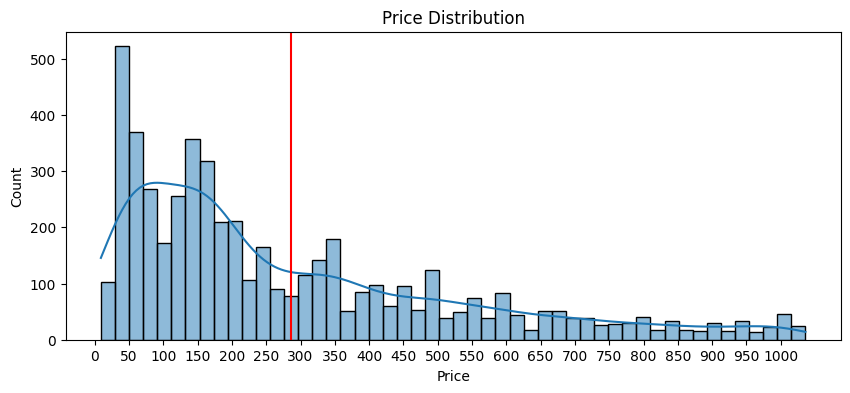

In [34]:
## Plot the price distrubtion

#Find the outliers in price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
higher_fence = Q3 + 1.5*IQR
lower_fence = Q1 - 1.5*IQR
print(f"Higher and lower fence of the price: {{{lower_fence} , {higher_fence}}} ")

#Plot the price distribution after remove the outlier
price_drop_outliers = dfcopy['price'].apply(lambda x: x if x<= higher_fence else None)
figsize = plt.figure(figsize=(10, 4))
sns.histplot(price_drop_outliers, bins=50, kde =True)
plt.xticks(np.arange(0, price_drop_outliers.max(), 50))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.axvline(x=price_drop_outliers.mean(), color = 'red')
plt.show()

2. Overal trend of the Jeans market

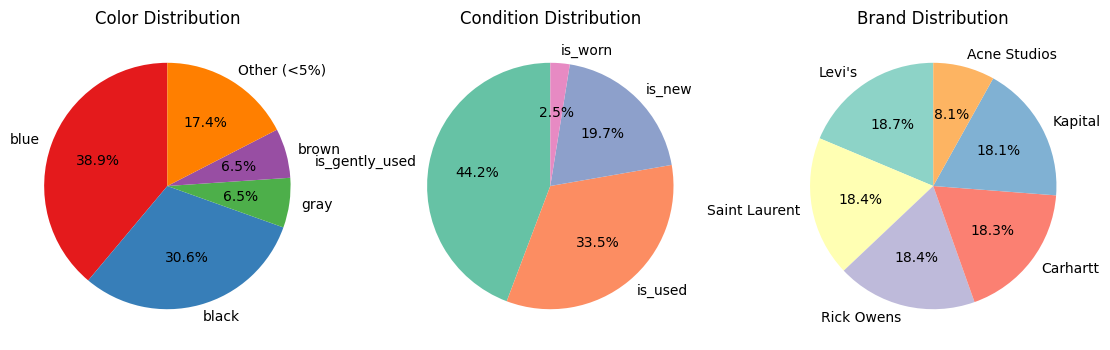

In [35]:
##Find the trend of the jeans sale

#Grouping colors (<5%) into "Other" group
colors = dfcopy['color'].value_counts()
other_grp_color = colors[colors/colors.sum() >= 0.05]
others_color = colors.sum() - other_grp_color.sum()
if others_color > 0:
    other_grp_color['Other (<5%)'] = others_color

#Grouping countries_origin (<5%) into "Other" group
countries = dfcopy['country_origin'].value_counts()
other_grp_country = countries[countries/countries.sum() >= 0.05]
others_country = countries.sum() - other_grp_country.sum()
if others_country > 0:
    other_grp_country['Other (<5%)'] = others_country

# Plot
plt.figure(figsize=(14, 4))
#Color plot
plt.subplot(1, 3, 1)
plt.pie(other_grp_color, labels=other_grp_color.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette('Set1'))
plt.title('Color Distribution')
#Condition plot
plt.subplot(1, 3, 2)
conditions=dfcopy['condition'].value_counts()
plt.pie(conditions, labels=conditions.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Condition Distribution')
#Country_origin plot
plt.subplot(1, 3, 3)
br=dfcopy['brand'].value_counts()
plt.pie(br, labels=br.index, autopct='%.1f%%',startangle=90, colors=sns.color_palette('Set3'))
plt.title('Brand Distribution')
plt.show()

3. Brand Performance

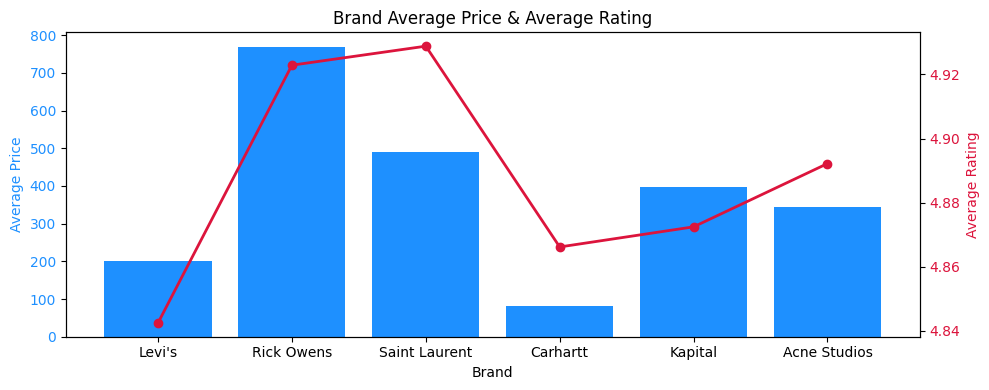

In [36]:
##Plot for the partern of price and rating over brands

#Create table of brand statistics
brand_stats = dfcopy.groupby('brand').agg(
    count=('price', 'count'),
    avg_price=('price', 'mean'),
    avg_rating=('user/seller_score/rating_average', 'mean')
).sort_values('count', ascending=False)
#Graph
fig, ax1 = plt.subplots(figsize=(10, 4))
# Bar plot for prices
ax1.bar(x=brand_stats.index, height=brand_stats['avg_price'],color='dodgerblue')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Average Price', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')
# Line plot for ratings
ax2 = ax1.twinx()
ax2.plot(brand_stats.index, brand_stats['avg_rating'], color='crimson', marker='o', linewidth=2)
ax2.set_ylabel('Average Rating', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title('Brand Average Price & Average Rating')
plt.tight_layout()
plt.show()

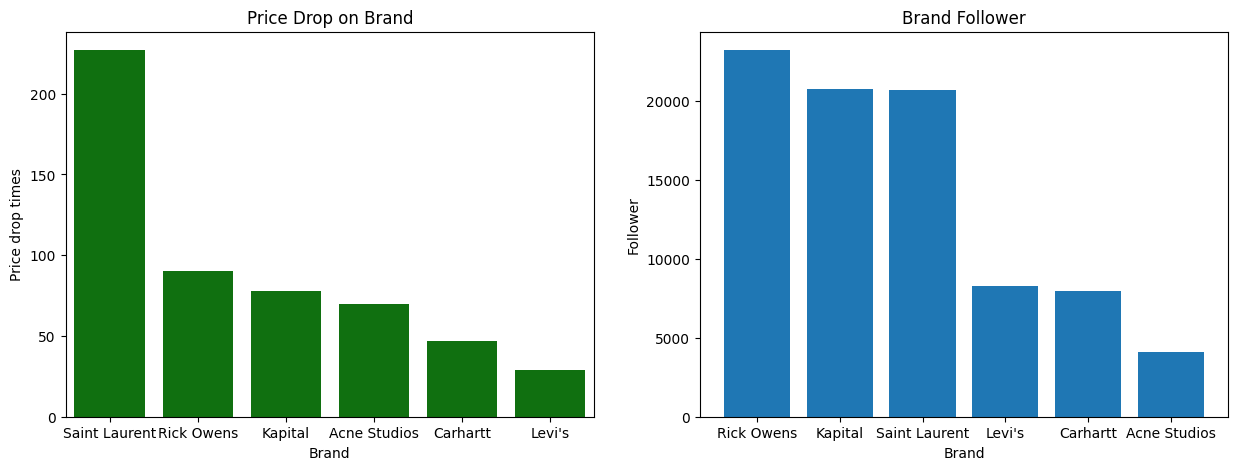

In [37]:
##Plot the pattern of the time price drop and follower by brand

dfcopy['price_drop_times'] = dfcopy['price_drops'][dfcopy['price_drops'] != 'None']
pricedrop_df = dfcopy[['brand', 'price_drop_times']].dropna()
brand_price_drop = pricedrop_df['brand'].value_counts()
# Create plot
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(x=brand_price_drop.index, y=brand_price_drop.values,color='Green')
plt.title('Price Drop on Brand')
plt.xlabel('Brand')
plt.ylabel('Price drop times')

follow = dfcopy.groupby('brand').agg(
    fl=('follower_count', 'sum')
).sort_values('fl', ascending=False)
plt.subplot(1, 2, 2)
plt.bar(x=follow.index, height=follow['fl'])
plt.xlabel('Brand')
plt.ylabel('Follower')
plt.title('Brand Follower')
plt.show()

4. Geographic Analysis: Seller Location and Shipping

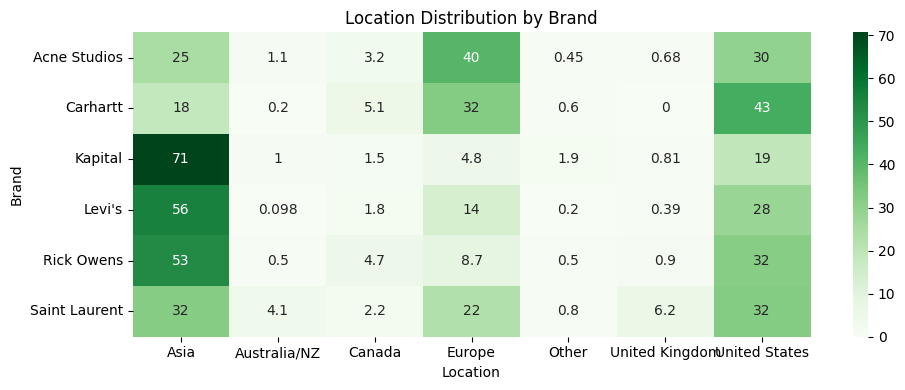

In [38]:
##Consider the metrics location and shipping amount and find where is the the region can be more focused
location_distribute = dfcopy.groupby('brand')['location'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
plt.figure(figsize=(10,4))
sns.heatmap(location_distribute, annot=True, cmap='Greens')
plt.xticks(rotation=0)
plt.xlabel('Location')
plt.ylabel('Brand')
plt.title('Location Distribution by Brand')
plt.tight_layout()

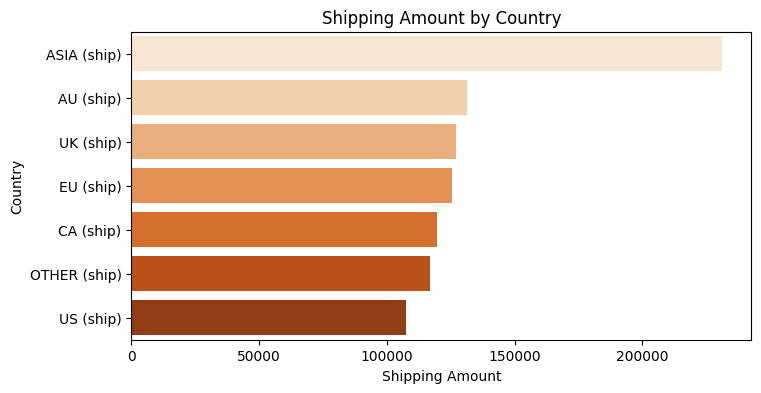

In [39]:
ship = shipping_df.sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=ship.values, y=ship.index, hue=ship.index, palette='Oranges')
plt.title('Shipping Amount by Country')
plt.xlabel('Shipping Amount')
plt.ylabel('Country')
plt.show()